In [88]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,5)
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from scipy.stats import ttest_ind
from scipy.stats import norm

[02/07/23 20:01:54] WARNING  C:\Users\99827604\Anaconda3\envs\univesp\lib\site-packages\plotly\grap ]8;id=738015;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\warnings.py\warnings.py]8;;\:]8;id=344728;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\warnings.py#109\109]8;;\
                             h_objs\__init__.py:288: DeprecationWarning:                                           
                                                                                                                   
                             distutils Version classes are deprecated. Use packaging.version                       
                             instead.                                                                              
                                                                                                                   
                                                                                                                   

In [2]:
palette=["#9b59b6", "#ff0000", "#00f0f0", "#00ff00"]

In [3]:
df = catalog.load("MICRODADOS_ENEM")
df_sample_all_years = catalog.load("sample_all_year_adjusted")

[02/07/23 19:29:52] INFO     Loading data from 'MICRODADOS_ENEM' (ParquetDataSet)...            ]8;id=772584;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=677412;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

[02/07/23 19:29:53] INFO     Loading data from 'sample_all_year_adjusted' (CSVDataSet)...       ]8;id=466056;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=369517;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

In [4]:
df.head()

See Full Dataframe in Mito 
 
 
 
 NU_INSCRICAO 
 NU_ANO 
 TP_ST_CONCLUSAO 
 IN_TREINEIRO 
 CO_MUNICIPIO_ESC 
 TP_PRESENCA_MT 
 TP_ESCOLA 
 TP_ENSINO 
 NU_NOTA_MT 
 
 
 
 
 0 
 210053865474 
 2021 
 1 
 0 
 NaN 
 0.0 
 1 
 NaN 
 NaN 
 
 
 1 
 210052384164 
 2021 
 1 
 0 
 NaN 
 1.0 
 1 
 NaN 
 461.5 
 
 
 2 
 210052589243 
 2021 
 1 
 0 
 NaN 
 0.0 
 1 
 NaN 
 NaN 
 
 
 3 
 210052128335 
 2021 
 2 
 0 
 2304202.0 
 1.0 
 2 
 1.0 
 659.5 
 
 
 4 
 210051353021 
 2021 
 2 
 0 
 2311603.0 
 1.0 
 2 
 1.0 
 582.6

In [5]:
df_sample_all_years.head()

See Full Dataframe in Mito 
 
 
 
 mean 
 ano 
 tp_escola 
 
 
 
 
 0 
 502.9466 
 2021 
 publica 
 
 
 1 
 505.8428 
 2021 
 publica 
 
 
 2 
 504.4545 
 2021 
 publica 
 
 
 3 
 509.7118 
 2021 
 publica 
 
 
 4 
 507.5524 
 2021 
 publica

[02/07/23 19:29:54] WARNING  C:\Users\99827604\AppData\Local\Temp\ipykernel_19984\2512338629.py:1:  ]8;id=538331;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\warnings.py\warnings.py]8;;\:]8;id=820734;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\warnings.py#109\109]8;;\
                             UserWarning: The palette list has more values (4) than needed (2),                    
                             which may not be intended.                                                            
                               sns.displot(data=df.query("NU_ANO == 2021 and TP_ESCOLA in [2,3]"),                 
                             x="NU_NOTA_MT", hue="TP_ESCOLA", kde=True, palette=palette);                          
                                                                                                                   

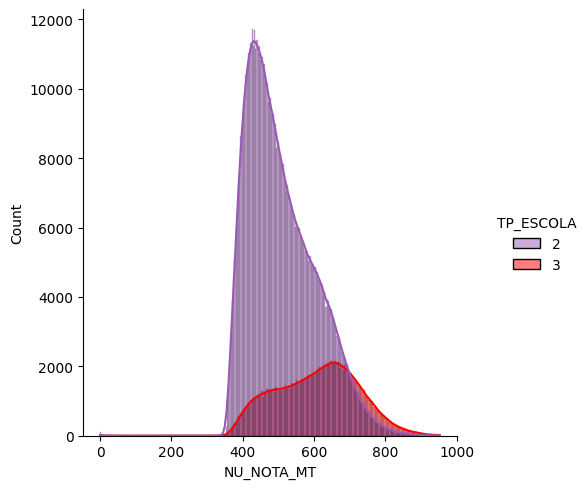

In [6]:
sns.displot(data=df.query("NU_ANO == 2021 and TP_ESCOLA in [2,3]"), x="NU_NOTA_MT", hue="TP_ESCOLA", kde=True, palette=palette);

[02/07/23 19:29:59] WARNING  C:\Users\99827604\AppData\Local\Temp\ipykernel_19984\789361444.py:1:   ]8;id=640714;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\warnings.py\warnings.py]8;;\:]8;id=404308;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\warnings.py#109\109]8;;\
                             UserWarning: The palette list has more values (4) than needed (2),                    
                             which may not be intended.                                                            
                               sns.displot(data=df.query("NU_ANO == 2021 and TP_ESCOLA in [2,3]"),                 
                             x="NU_NOTA_MT", hue="TP_ESCOLA", kind="ecdf", palette=palette);                       
                                                                                                                   

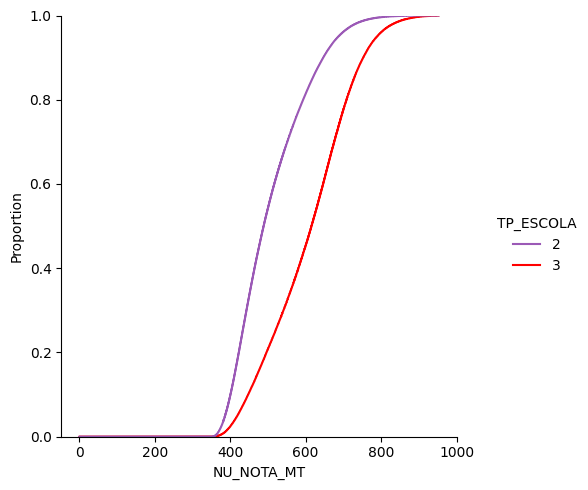

In [7]:
sns.displot(data=df.query("NU_ANO == 2021 and TP_ESCOLA in [2,3]"), x="NU_NOTA_MT", hue="TP_ESCOLA", kind="ecdf", palette=palette);

<seaborn.axisgrid.FacetGrid object at 0x00000134D2FD06A0>

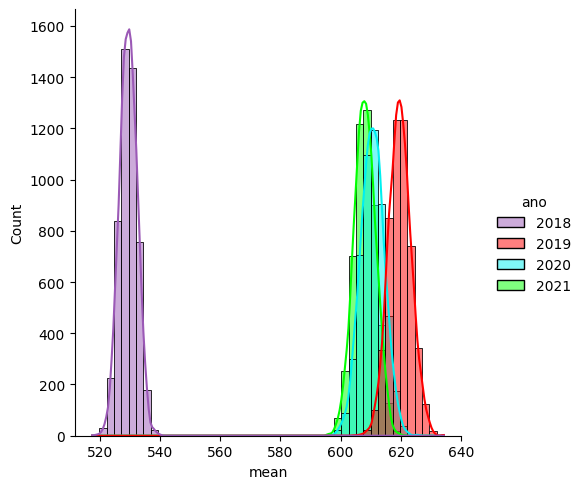

In [8]:
sns.displot(data=df_sample_all_years.query("tp_escola == 'privado'"), x="mean", hue="ano", kde=True, palette=palette)

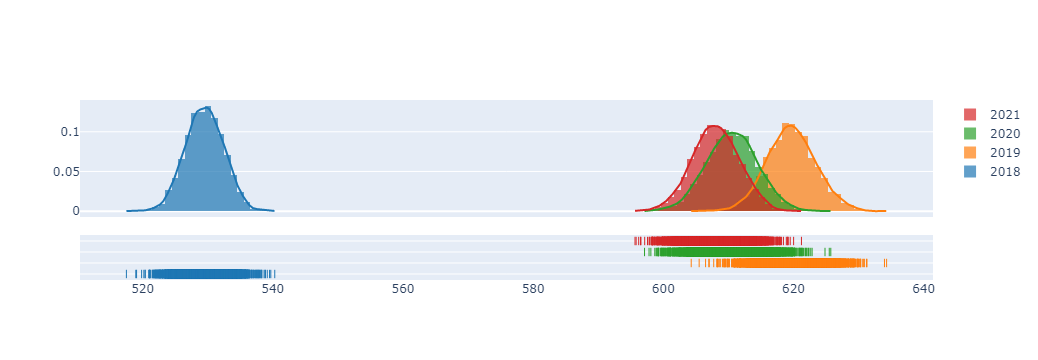

In [93]:
dfaux = pd.pivot(df_sample_all_years.query("tp_escola == 'privado'"), columns="ano", values="mean")
mean_2018 = dfaux[2018].values
mean_2018 = mean_2018[~np.isnan(mean_2018)]
mean_2019 = dfaux[2019].values
mean_2019 = mean_2019[~np.isnan(mean_2019)]
mean_2020 = dfaux[2020].values
mean_2020 = mean_2020[~np.isnan(mean_2020)]
mean_2021 = dfaux[2021].values
mean_2021 = mean_2021[~np.isnan(mean_2021)]
                      
data = [mean_2018, mean_2019, mean_2020, mean_2021]
group_labels = [2018, 2019, 2020, 2021]

fig = ff.create_distplot(data, group_labels)
fig.show()

<seaborn.axisgrid.FacetGrid object at 0x00000134D2FB5CC0>

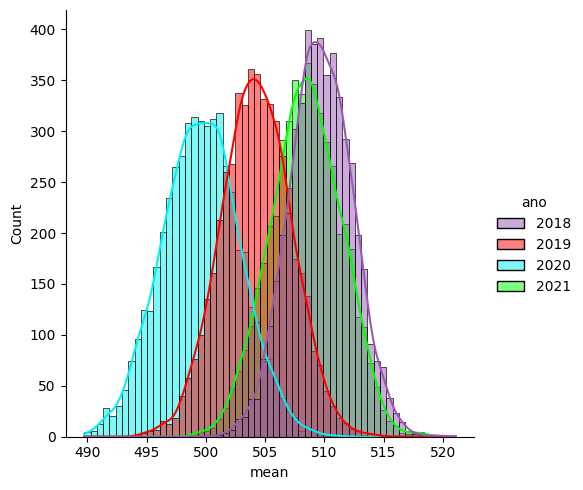

In [9]:
sns.displot(data=df_sample_all_years.query("tp_escola == 'publica'"), x="mean", hue="ano", kde=True, palette=palette)

[02/07/23 20:04:24] WARNING  C:\Users\99827604\Anaconda3\envs\univesp\lib\site-packages\plotly\io\_ ]8;id=269131;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\warnings.py\warnings.py]8;;\:]8;id=106803;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\warnings.py#109\109]8;;\
                             renderers.py:395: DeprecationWarning:                                                 
                                                                                                                   
                             distutils Version classes are deprecated. Use packaging.version                       
                             instead.                                                                              
                                                                                                                   
                                                                                                                   

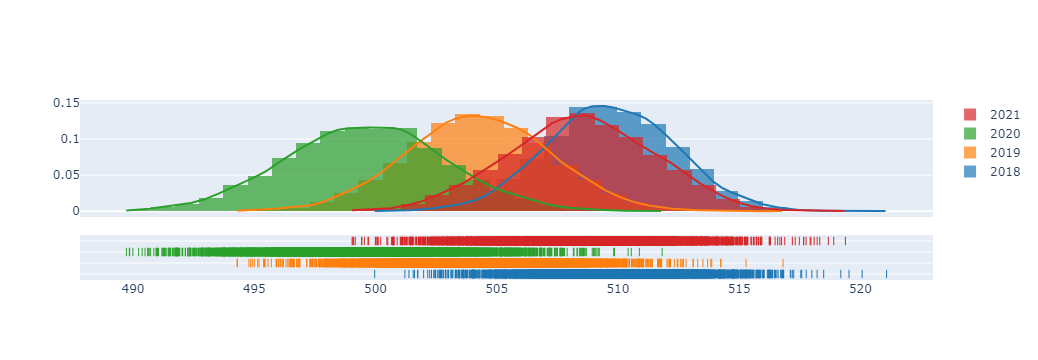

In [92]:
dfaux = pd.pivot(df_sample_all_years.query("tp_escola == 'publica'"), columns="ano", values="mean")
mean_2018 = dfaux[2018].values
mean_2018 = mean_2018[~np.isnan(mean_2018)]
mean_2019 = dfaux[2019].values
mean_2019 = mean_2019[~np.isnan(mean_2019)]
mean_2020 = dfaux[2020].values
mean_2020 = mean_2020[~np.isnan(mean_2020)]
mean_2021 = dfaux[2021].values
mean_2021 = mean_2021[~np.isnan(mean_2021)]
                      
data = [mean_2018, mean_2019, mean_2020, mean_2021]
group_labels = [2018, 2019, 2020, 2021]

fig = ff.create_distplot(data, group_labels)
fig.show()

<seaborn.axisgrid.FacetGrid object at 0x00000134D5347490>

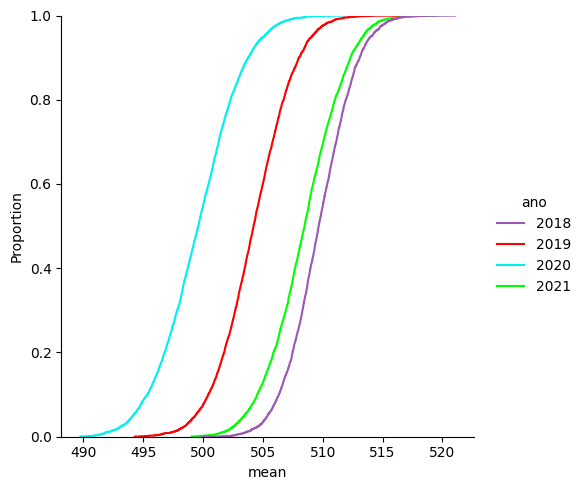

In [10]:
sns.displot(data=df_sample_all_years.query("tp_escola == 'publica'"), x="mean", hue="ano", kind="ecdf", palette=palette)

<seaborn.axisgrid.FacetGrid object at 0x00000134D5346080>

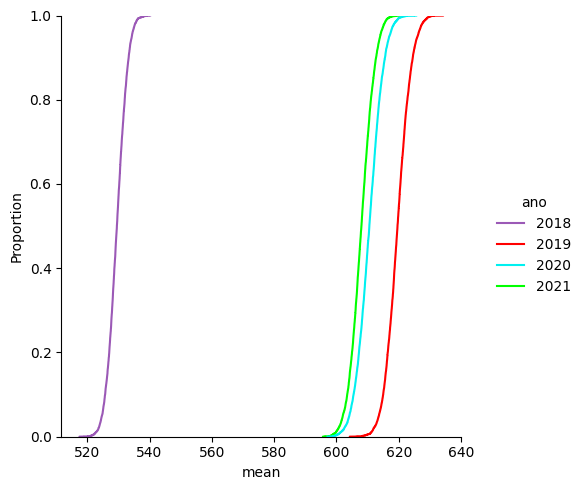

In [11]:
sns.displot(data=df_sample_all_years.query("tp_escola == 'privado'"), x="mean", hue="ano", kind="ecdf", palette=palette)

[02/07/23 19:30:03] WARNING  C:\Users\99827604\AppData\Local\Temp\ipykernel_19984\2427082396.py:1:  ]8;id=791819;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\warnings.py\warnings.py]8;;\:]8;id=57005;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\warnings.py#109\109]8;;\
                             UserWarning: The palette list has more values (4) than needed (2),                    
                             which may not be intended.                                                            
                               sns.displot(data=df_sample_all_years, x="mean", hue="tp_escola",                    
                             kde=True, palette=palette)                                                            
                                                                                                                   

<seaborn.axisgrid.FacetGrid object at 0x00000134D53BDBD0>

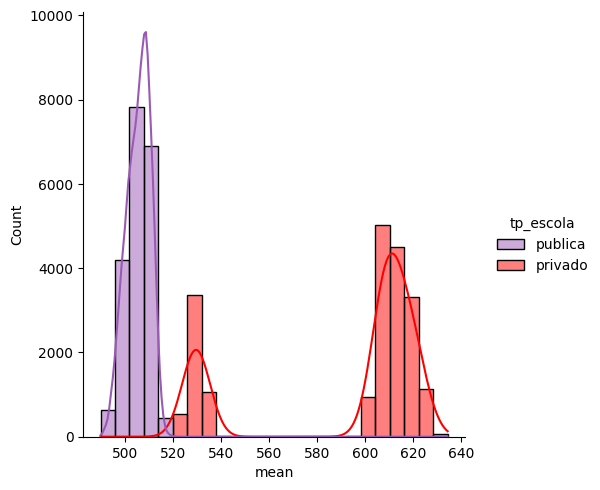

In [12]:
sns.displot(data=df_sample_all_years, x="mean", hue="tp_escola", kde=True, palette=palette)

[02/07/23 19:30:04] WARNING  C:\Users\99827604\AppData\Local\Temp\ipykernel_19984\3337038996.py:1:  ]8;id=852682;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\warnings.py\warnings.py]8;;\:]8;id=629170;file://C:\Users\99827604\Anaconda3\envs\univesp\lib\warnings.py#109\109]8;;\
                             UserWarning: The palette list has more values (4) than needed (2),                    
                             which may not be intended.                                                            
                               sns.displot(data=df_sample_all_years.query("ano > 2018"), x="mean",                 
                             hue="tp_escola", kde=True, palette=palette)                                           
                                                                                                                   

<seaborn.axisgrid.FacetGrid object at 0x00000134D226DBA0>

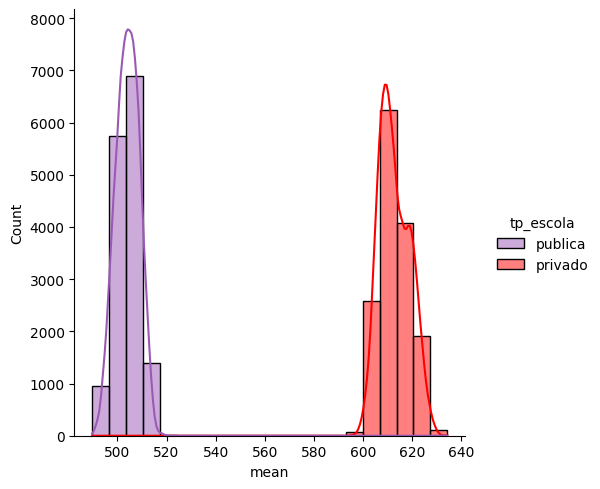

In [13]:
sns.displot(data=df_sample_all_years.query("ano > 2018"), x="mean", hue="tp_escola", kde=True, palette=palette)

In [14]:
df_sample_all_years["ano"].unique()

array([2021, 2020, 2019, 2018], dtype=int64)

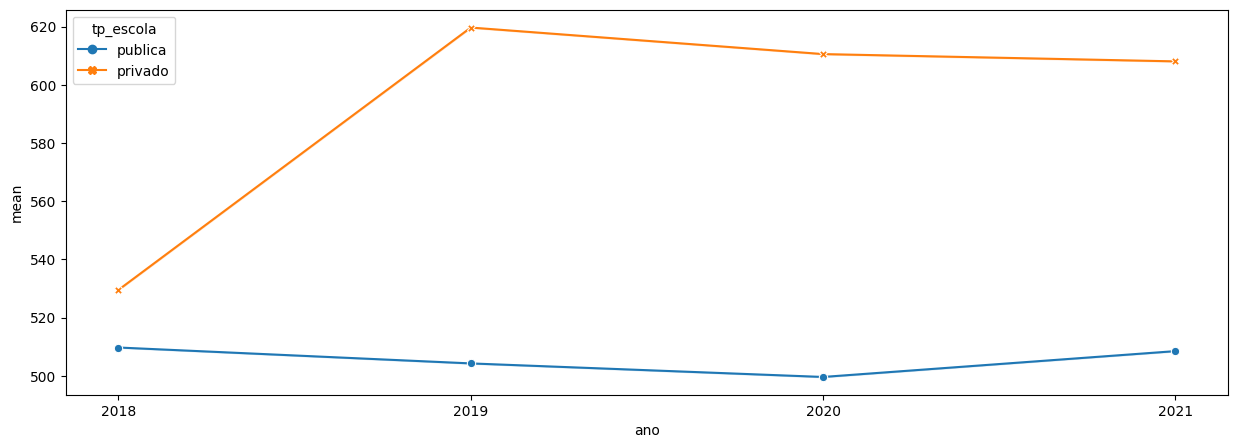

In [15]:
g = sns.lineplot(data=df_sample_all_years, y="mean", x="ano", hue="tp_escola", style="tp_escola", markers=True, dashes=False)

g.set_xticks(df_sample_all_years["ano"].unique())
g.set_xticklabels(df_sample_all_years["ano"].unique());

<seaborn.axisgrid.FacetGrid object at 0x00000134D8E02B60>

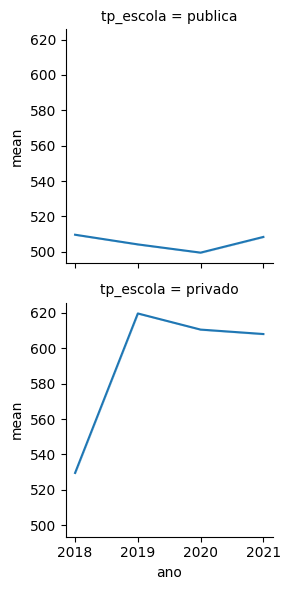

In [16]:
g = sns.FacetGrid(data=df_sample_all_years, row="tp_escola")
g.map(sns.lineplot, "ano", "mean")

In [17]:
df_pivoted = pd.pivot(df_sample_all_years, columns=["ano", "tp_escola"], values="mean")

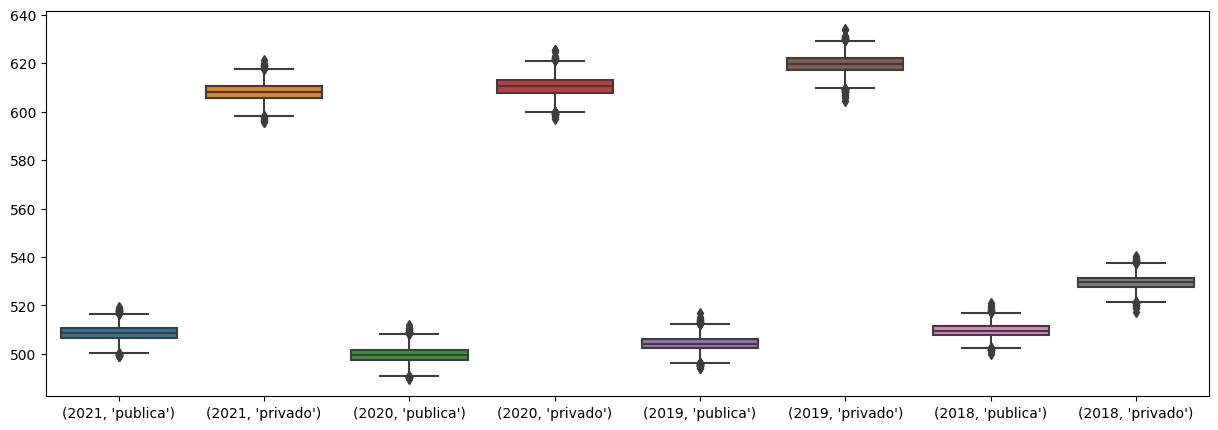

In [18]:
sns.boxplot(df_pivoted)

## Teste de hipóteses escolas públicas

In [37]:
def teste_hip(df, ano1, ano2, tp_escola_1="publica", tp_escola_2="publica", alfa=0.95):
    mean_ano1 = df[(ano1, tp_escola_1)].dropna().values
    mean_ano2 = df[(ano2, tp_escola_2)].dropna().values
    print(ttest_ind(mean_ano1, mean_ano2, equal_var=False, alternative='greater'))

    print(f"Intervalo de confiança {ano1} - {tp_escola_1}: {norm.interval(alfa, mean_ano1.mean(), mean_ano1.std())[0]}, {mean_ano1.mean()}, {norm.interval(alfa, mean_ano1.mean(), mean_ano1.std())[1]}")
    print(f"Intervalo de confiança {ano2} - {tp_escola_2}: {norm.interval(alfa, mean_ano2.mean(), mean_ano2.std())[0]}, {mean_ano2.mean()}, {norm.interval(alfa, mean_ano2.mean(), mean_ano2.std())[1]}")

    

In [28]:
teste_hip(df_pivoted, 2020, 2019, "publica") # Não se rejeita H0

Ttest_indResult(statistic=-74.51064046411429, pvalue=1.0)
Intervalo de confiança 2020: 493.15243257308606, 499.57992348, 506.0074143869139
Intervalo de confiança 2019: 498.4325533810447, 504.23629878, 510.0400441789553


In [29]:
teste_hip(df_pivoted, 2020, 2021, "publica") # Não se rejeita H0

Ttest_indResult(statistic=-141.21576627976884, pvalue=1.0)
Intervalo de confiança 2020: 493.15243257308606, 499.57992348, 506.0074143869139
Intervalo de confiança 2021: 502.57700384083347, 508.45747408, 514.3379443191665


In [30]:
teste_hip(df_pivoted, 2020, 2018, "publica") # Não se rejeita H0

Ttest_indResult(statistic=-170.0050030091781, pvalue=1.0)
Intervalo de confiança 2020: 493.15243257308606, 499.57992348, 506.0074143869139
Intervalo de confiança 2018: 504.52850273015315, 509.7024956, 514.8764884698469


## Teste de hipóteses escolas privadas

In [31]:
teste_hip(df_pivoted, 2020, 2019, "privado") # Não se rejeita H0

Ttest_indResult(statistic=-119.24717382223184, pvalue=1.0)
Intervalo de confiança 2020: 602.8943027692927, 610.54882972, 618.2033566707072
Intervalo de confiança 2019: 612.3387388242016, 619.66862436, 626.9985098957983


In [32]:
teste_hip(df_pivoted, 2020, 2021, "privado") # Não se rejeita H0

Ttest_indResult(statistic=33.39866967825684, pvalue=3.506252264134792e-232)
Intervalo de confiança 2020: 602.8943027692927, 610.54882972, 618.2033566707072
Intervalo de confiança 2021: 601.0034457773103, 608.0425266799999, 615.0816075826896


In [33]:
teste_hip(df_pivoted, 2020, 2018, "privado") # Rejeita-se H0

Ttest_indResult(statistic=1174.2200221427433, pvalue=0.0)
Intervalo de confiança 2020: 602.8943027692927, 610.54882972, 618.2033566707072
Intervalo de confiança 2018: 523.7879668747102, 529.5197750399999, 535.2515832052896


In [40]:
teste_hip(df_pivoted, 2020, 2020, "privado", "publica") # Rejeita H0

Ttest_indResult(statistic=1538.5039253825419, pvalue=0.0)
Intervalo de confiança 2020 - privado: 602.8943027692927, 610.54882972, 618.2033566707072
Intervalo de confiança 2020 - publica: 493.15243257308606, 499.57992348, 506.0074143869139
